# Regularized Multiple Linear Regression

**TODO** touch up this intro

Let's tighten up the notation.  Say we have $N$ observations and $J < N$ predictors.  Then multiple linear regression attempts to predict a response variable $y$ with the model (technically a hyper-plane)

$$\hat{y}_n = \hat{\beta}_0 + \hat{\beta}_1 x_{n,1} + \ldots + \hat{\beta}_J x_{n,J} = \hat{\beta}_0 + \sum_{j=1}^J \hat{\beta}_j x_{n,j}$$

In the wild, you might see this model written using matrix multiplication as

$$\hat{y}_n = X \hat{\beta}$$

If you've never heard of matrix multiplication before, worry not.  Simply think of the token/1-gram $X\beta$ as a short hand for the version you prefer above.

The loss function regularized multiple linear regression is

$$loss_{\lambda}(\beta| x, y) = \sum_{n=1}^N (y_n - \beta_0 - \sum_{j=1}^J \beta_j x_{n,j}) ^ 2 + \lambda \sum_{j=1}^J \beta_j^2$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy.optimize import minimize
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/hospital.csv")
df.head()

stay   age  infection_risk   xray  beds  region  nurses
0   7.13  55.7             4.1   39.6   279       4     241
1   8.82  58.2             1.6   51.7    80       2      52
2   8.34  56.9             2.7   74.0   107       3      54
3   8.95  53.7             5.6  122.8   147       4     148
4  11.20  56.5             5.7   88.9   180       1     151

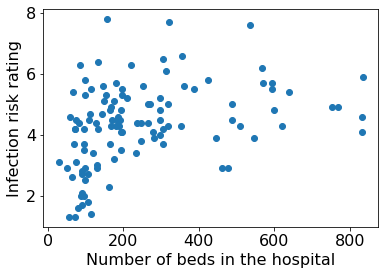

In [6]:
plt.scatter(df["beds"], df["infection_risk"]);
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

In [7]:
N = np.shape(df)[0]
x = df["beds"].to_numpy()
m = np.mean(x)
s = np.std(x)
x = (x - m) / s
o = np.argsort(x)
x = x[o]
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]
np.std(X, axis = 0)
X = X / np.std(X, axis = 0)
y = df.loc[o, "infection_risk"]

In [8]:
fit = LinearRegression().fit(X, y)
yhat = fit.predict(X)

In [9]:
fit.coef_

array([ 6.84720545e-01,  2.10745151e+00, -2.35348028e+00, -6.95598891e+01,
        9.10758429e+01,  3.79414648e+02, -6.87777402e+02, -2.74285746e+02,
        1.06803327e+03, -5.07109266e+02])

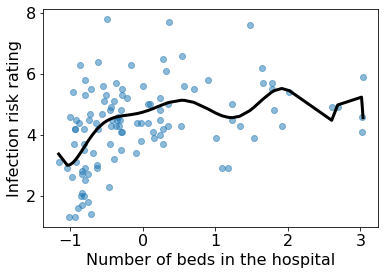

In [10]:
plt.scatter(x, y, alpha = 0.5);
plt.plot(x, yhat, c = "black", linewidth = 3);
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

## Ridge Regression

In [11]:
fitR = Ridge(alpha = 10).fit(X, y)
yhatR = fitR.predict(X)

In [12]:
fitR.coef_

array([ 6.75925005e-01, -4.66664752e-01,  1.56994556e-01, -4.28073279e-02,
        1.85303862e-02, -8.19443568e-03, -2.98947239e-03, -3.84676058e-03,
        1.68533736e-04,  4.30976923e-03])

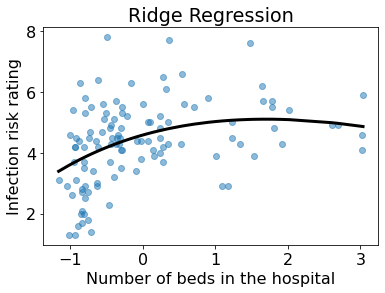

In [13]:
plt.scatter(x, y, alpha = 0.5);
plt.plot(x, yhatR, c = "black", linewidth = 3);
plt.title("Ridge Regression");
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

## Lasso Regression

In [16]:
maxL = np.max(np.abs(np.matmul(np.transpose(X), y)))
lambdas = np.logspace(-4, np.log10(maxL), num = 200)

In [20]:
fitL = Lasso(alpha = 5 / N).fit(X, y) # try np.max(lambdas) / N
yhatL = fitL.predict(X)

In [21]:
fitL.coef_

array([ 0.73308907, -0.38904694,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

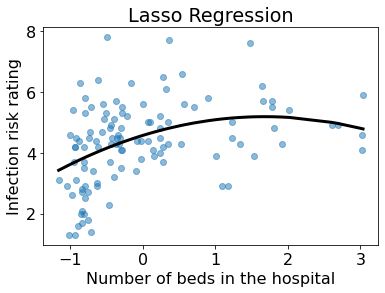

In [22]:
plt.scatter(x, y, alpha = 0.5);
plt.plot(x, yhatL, c = "black", linewidth = 3);
plt.title("Lasso Regression");
plt.xlabel("Number of beds in the hospital");
plt.ylabel("Infection risk rating");

## Coefficient Plots

In [ ]:
coefs = []
for l in lambdas:
    fit = Lasso(alpha = l / N, warm_start = True).fit(X, y)
    coefs.append(fit.coef_)
coefs = np.asarray(coefs)
coefs = coefs / np.max(np.abs(coefs))

In [ ]:
plt.plot(lambdas, coefs);
plt.xscale("log")
plt.xlabel("log $\lambda$");
plt.ylabel("$\\beta$");